### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 4
### Due: Friday, Feb 21st at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [73]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import corner
import numdifftools as nd

In [74]:
#Part 1
# Reading in data (hw4_data1.npy)
#(10x2) numpy array
#Column 1- voltage
#Column 2- Voltage uncertainties
data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw4_data_1.npy")
voltage= data[:,0]
uncertainty= data [:,1]

# Part 1: Compute sample mean and standard error from the data that was read in 

sam_mean=np.sum(voltage/uncertainty**2)/np.sum(1/uncertainty**2)
std_error = np.std(voltage,ddof=1)/np.sqrt(len(voltage))
print(f"Part #1: Sample Mean: {sam_mean:.4f}, Standard Error: {std_error:.4f}\n")

Part #1: Sample Mean: 4.9421, Standard Error: 0.3284



In [97]:
#Part 2
#Definition of appropriate Ln_likelihood
#Calculation of Best-Fit mean Voltage

import scipy.stats as stats

def ln_likelihood(mu, voltage, uncertainty):
    return np.sum(stats.norm.logpdf(voltage, loc=mu, scale=uncertainty))

mu_val = np.linspace(3, 7, 1000)
ln_likeli = np.array([ln_likelihood(mu, voltage, uncertainty) for mu in mu_val])

bestfit_mu = mu_val[np.argmax(ln_likeli)]
print(f"Part #2: Best-fit Mean Voltage: {bestfit_mu:.4f}\n")

Part #2: Best-fit Mean Voltage: 4.9419



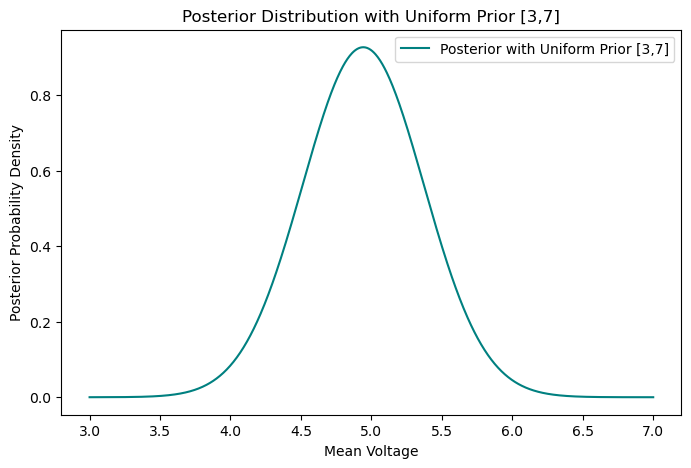

In [98]:
#Part 3
#Computing Bayesian Posterior
#Using prior Range [3,7]

pri_uni=np.ones_like(mu_val)/(7-3)
post_uni=np.exp(ln_likeli)*pri_uni
post_uni/=np.trapz(post_uni, mu_val) #Normalization for pdf as require in part 3 

#Plotting the Bayesian posterior probability density
plt.figure(figsize=(8, 5))
plt.plot(mu_val, post_uni, label='Posterior with Uniform Prior [3,7]', color='teal')
plt.xlabel("Mean Voltage")
plt.ylabel("Posterior Probability Density")
plt.legend()
plt.title("Posterior Distribution with Uniform Prior [3,7]")
plt.show()

In [99]:
#Part 4 
#finding  the equal-tailed 68.3% credible region for the mean,
#Comparison between upper and lower bounds
# Finding the MAP Estimate 

cdf = np.cumsum(post_uni) / np.sum(post_uni)
lower_bnd = mu_val[np.argmax(cdf >= 0.158)]
upper_bnd = mu_val[np.argmax(cdf >= 0.841)]
map_estimate = mu_val[np.argmax(post_uni)]
print(f"Part #4: Credible Interval for 68.3%: [{lower_bnd:.3f}, {upper_bnd:.3f}], MAP Estimate: {map_estimate:.3f}")

Part #4: Credible Interval for 68.3%: [4.510, 5.370], MAP Estimate: 4.942


In [100]:
#Part 5
#Computation of Posterior using a repeation of steps 3 and 4 
#Using a narrower uniform prior
#Range 4.6 to 5.4.

pri_narrow = np.where((mu_val >= 4.6) & (mu_val <= 5.4), 1, 0)
post_narrow = np.exp(ln_likeli) * pri_narrow
post_narrow /= np.trapz(post_narrow, mu_val)

In [101]:
#Part 6
# Computation of posterior with Gaussian prior
#Computation of Posterior using a repeation of steps 3 and 4 
# Standard Deviation (0.3) and mean of 6

pri_gauss = stats.norm.pdf(mu_val, loc=6, scale=0.3)
post_gauss = np.exp(ln_likeli) * pri_gauss
post_gauss /= np.trapz(post_gauss, mu_val)


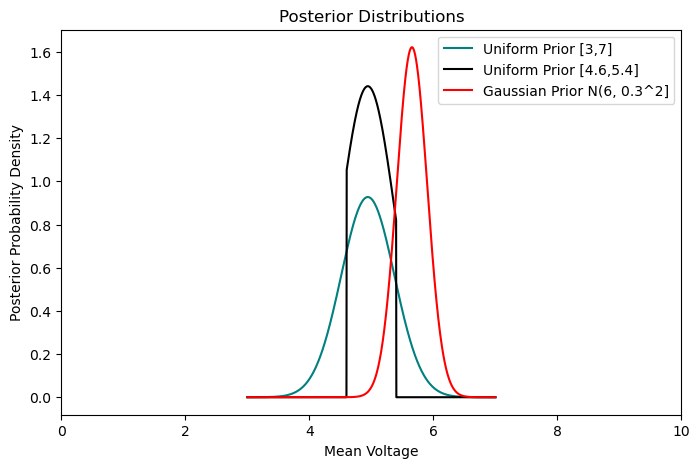

In [102]:
#Part 7 
#Plots for all of the normalized posterior pdfs for (mu)
# From parts 3,5,6

plt.figure(figsize=(8, 5))
plt.plot(mu_val, post_uni, label='Uniform Prior [3,7]', linestyle='solid', color='teal')
plt.plot(mu_val, post_narrow, label='Uniform Prior [4.6,5.4]', linestyle='solid', color='black')
plt.plot(mu_val, post_gauss, label='Gaussian Prior N(6, 0.3^2]', linestyle='solid', color='red')
plt.xlabel("Mean Voltage")
plt.ylabel("Posterior Probability Density")
plt.legend()
plt.xlim(0, 10)
plt.title("Posterior Distributions")
plt.show()

In [103]:
# Part 8: Compute Bayesian evidence
# Evidence for delta function prior at best-fit mean not using scipy.stats
# Approximate delta function

pri_wi = np.ones_like(mu_val) / (mu_val.max() - mu_val.min())  # Uniform prior
evi_wi = np.trapz(np.exp(ln_likeli) * pri_wi, mu_val)

#Compute Bayesian evidence under the delta function prior
#not using scipy.stats but by definition

bestfit_mu = mu_val[np.argmax(ln_likeli)]  # Best-fit value of mu
pri_del = np.zeros_like(mu_val)
pri_del[np.argmin(np.abs(mu_val - bestfit_mu))] = 1  # Approximate delta function

evi_del = np.trapz(np.exp(ln_likeli) * pri_del, mu_val)

#Computation of  the Bayes Factor
#Using reason explained in class to verify if we have strong evidence
#Depending on the value of the Bayes factor found
bay_fac = evi_del / evi_wi 

print(f"Evidence (wide prior): {evi_wi:.4e}")
print(f"Evidence (delta prior): {evi_del:.4e}")
print(f"Bayes Factor: {bay_fac:.4f}\n")

# Analysis for which model is preferred.
#Using the Bayes Factor which was calucated

if bayes_factor > 1:
    print("The delta function prior model is favored.")
else:
    print("The wide prior model is favored, suggesting an Occam penalty.")



Evidence (wide prior): 2.8919e-08
Evidence (delta prior): 4.2947e-10
Bayes Factor: 0.0149

The wide prior model is favored, suggesting an Occam penalty.


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [48]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

In [49]:
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt

In [90]:
#Part1

# Reading in data (hw4_data2.npy)
#(3x20) numpy array
data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw4_data_2.npy")

# Defining x, y, and sigma_y
x, y, sigma_y = data

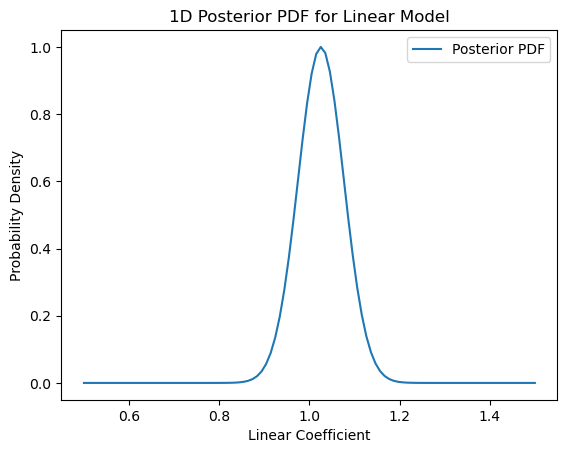

In [91]:
#Part2 
import scipy.stats 

#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

Lin_coe = np.linspace(0.5, 1.5, 100)
y_intercept = -0.23  # Fixed intercept as stated in problem
logPost = np.array([logL([y_intercept, theta_1], data) for theta_1 in Lin_coe])
post = np.exp(logPost - np.max(logPost))  # Normalize

plt.figure()
plt.plot(Lin_coe, post, label='Posterior PDF')
plt.xlabel('Linear Coefficient')
plt.ylabel('Probability Density')
plt.title('1D Posterior PDF for Linear Model')
plt.legend()
plt.show()


In [92]:
#Using 1D grided linear prior
#Part 3 Compute Bayesian Evidence for Linear Model
Z_lin = np.trapz(post, Lin_coe)
print(f'Part #3: Bayesian Evidence for Linear Model: {Z_lin}')

Part #3: Bayesian Evidence for Linear Model: 0.1270629151582759


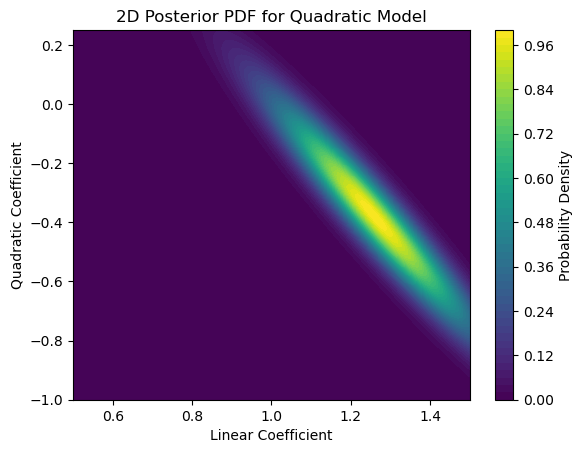

In [93]:
# Part 4: Compute 2D posterior for linear & quadratic coefficients
#Two-dimensional model because the -intercept is fixed

Lin_coe = np.linspace(0.5, 1.5, 100)
quad_coe = np.linspace(-1, 0.25, 100)
logPost = np.zeros((100, 100))

for i, theta_1 in enumerate(Lin_coe):
    for j, theta_2 in enumerate(quad_coe):
        logPost[i, j] = logL([y_intercept, theta_1, theta_2], data)
        
#Normalization
post_2D = np.exp(logPost - np.max(logPost)) 

#Plotting 2D Posterior PDF
plt.figure()
plt.contourf(Lin_coe, quad_coe, post_2D.T, levels=50, cmap='viridis')
plt.xlabel('Linear Coefficient')
plt.ylabel('Quadratic Coefficient')
plt.title('2D Posterior PDF for Quadratic Model')
plt.colorbar(label='Probability Density')
plt.show()

In [94]:
#Part5
#Using your 2D gridded likelihood-x-prior
# Compute Bayesian Evidence for Quadratic Model

Z_quad = np.trapz(np.trapz(post_2D, quad_coe, axis=1), Lin_coe_2D)
print(f'Part #5: Bayesian Evidence for Quadratic Model: {Z_quad}')


Part #5: Bayesian Evidence for Quadratic Model: 0.07684854262857398


In [96]:
# Part 6: Compute Bayes Factor
#Bayes factor for a linear versus quadratic model

bay_fac = Z_quad / Z_lin
print(f'Part #6: Bayes Factor Quadratic vs Linear: {bay_fac}')


Part #6: Bayes Factor Quadratic vs Linear: 0.604807016530729
